<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Time_Series_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY

## Description

This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

## Get the Stock quote

In [ ]:
 df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


### Get the number of rows and columns in the data set

In [ ]:
df.shape

(2003, 6)

### Visualize

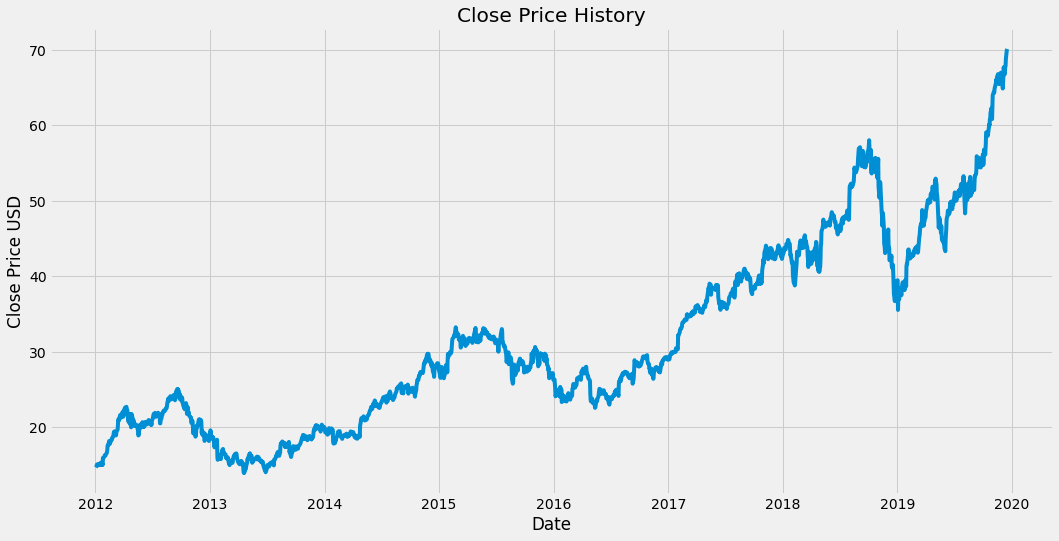

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

### Create a new dataframe with only the 'Close' column

In [ ]:
data = df.filter(['Close'])

### Convert the dataframe to a numpy array

In [ ]:
dataset = data.values

### Get the number of rows to train the model on

In [ ]:
training_data_len = math.ceil(len(dataset) *.8)

training_data_len

1603

### Scale the data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data = scaler.fit_transform(dataset)

### Na itt elcsúszott az egész, mivel a MinMax átalakítást az egész mintán végezte el és csak most fogja leválogatni tanuló és teszt mintára

In [ ]:
train_data = scaled_data[0:training_data_len, :]

### Split the data into x_train and y_train data sets

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

In [ ]:
print(type(x_train))
print(type(x_train[1]))
print(x_train[1].shape)
print(x_train[1])

<class 'list'>
<class 'numpy.ndarray'>
(60,)
[0.01457063 0.01748985 0.02026915 0.01984303 0.02080338 0.02036454
 0.01962679 0.01862191 0.02173194 0.02453668 0.02367172 0.01893355
 0.02345548 0.01900352 0.03569838 0.03440732 0.0360927  0.03973694
 0.04194384 0.0417594  0.0410789  0.04397903 0.04670744 0.04979839
 0.05479095 0.0652785  0.06543749 0.07127594 0.07563885 0.06814049
 0.07102789 0.07097066 0.07906688 0.07791571 0.08004628 0.08387497
 0.08600558 0.09214292 0.09661394 0.09790501 0.09835659 0.09071194
 0.08886753 0.08914103 0.09632778 0.09835024 0.10269409 0.11293358
 0.12659476 0.12403805 0.1240444  0.13392141 0.13701237 0.13481179
 0.13280207 0.13070964 0.13766105 0.14243103 0.14442805 0.13949272]


In [ ]:
print(type(y_train))
print(type(y_train[1]))
print(y_train[0].shape)
print(y_train[0])
print(y_train[1])

<class 'list'>
<class 'numpy.float64'>
()
0.13949272033425864
0.13293562570222134


### Convert the x_train and y_train to numpy array

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1543, 60)
(1543,)


### Reshape the data

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1543, 60, 1)

In [ ]:
print(x_train[1][1:10])

[[0.01748985]
 [0.02026915]
 [0.01984303]
 [0.02080338]
 [0.02036454]
 [0.01962679]
 [0.01862191]
 [0.02173194]
 [0.02453668]]


### Build the LSTM model

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 32,551
Trainable params: 32,551
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 35s 21ms/step - loss: 0.0028


### Create the testing data set

In [ ]:
# Create a new array containing scaled values from index 1543 to 2003

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

In [ ]:
print(type(scaled_data))
print(type(test_data))
print(scaled_data.shape)
print(test_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2003, 1)
(460, 1)


### Create the data sets x_test and y_test

In [ ]:
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
print(type(y_test))
print(y_test.shape)
print(y_test[1])

print(type(x_test))
print(x_test[1].shape)
print(x_test[1])

<class 'numpy.ndarray'>
(400, 1)
[46.57749939]
<class 'list'>
(60,)
[0.51958863 0.53294452 0.54839284 0.54581069 0.54460864 0.53071854
 0.53610544 0.53882114 0.53815331 0.53085209 0.53935536 0.55288929
 0.56063573 0.5528448  0.5460333  0.54696818 0.54416348 0.53205414
 0.53178703 0.51411273 0.50333899 0.4859318  0.52079068 0.50106844
 0.49278779 0.49857536 0.49367817 0.50129106 0.51562638 0.52092423
 0.50124656 0.50868133 0.5229276  0.51932152 0.52688985 0.52951649
 0.53436918 0.54514292 0.5433621  0.52092423 0.48940432 0.4872674
 0.47702787 0.48018873 0.48272638 0.47426767 0.48735639 0.50445198
 0.53770815 0.53913274 0.57002938 0.5759505  0.57991274 0.5857448
 0.59767603 0.5912207  0.58926183 0.58164901 0.58939538 0.5840976 ]


### Convert the data to a numpy array

In [ ]:
x_test = np.array(x_test)

### Reshape the data

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print(type(x_test))
print(x_test.shape)
print(x_test[1][1:5])

<class 'numpy.ndarray'>
(400, 60, 1)
[[0.53294452]
 [0.54839284]
 [0.54581069]
 [0.54460864]]


### Get the models predicted price values

In [ ]:
predictions = model.predict(x_test)

### Invert the scaled values to the original

In [ ]:
predictions = scaler.inverse_transform(predictions)

### Measure the error of the prediction

In [ ]:
root_mean_square_error = np.sqrt( np.mean( predictions - y_test )**2 )

In [ ]:
root_mean_square_error

1.384296751022339

### Plot the data

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]

print(type(valid))
print(valid.shape)
print(valid.columns)

valid['Predictions'] = predictions

print(valid.shape)
print(valid.columns)

<class 'pandas.core.frame.DataFrame'>
(400, 1)
Index(['Close'], dtype='object')
(400, 2)
Index(['Close', 'Predictions'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Visualize the data

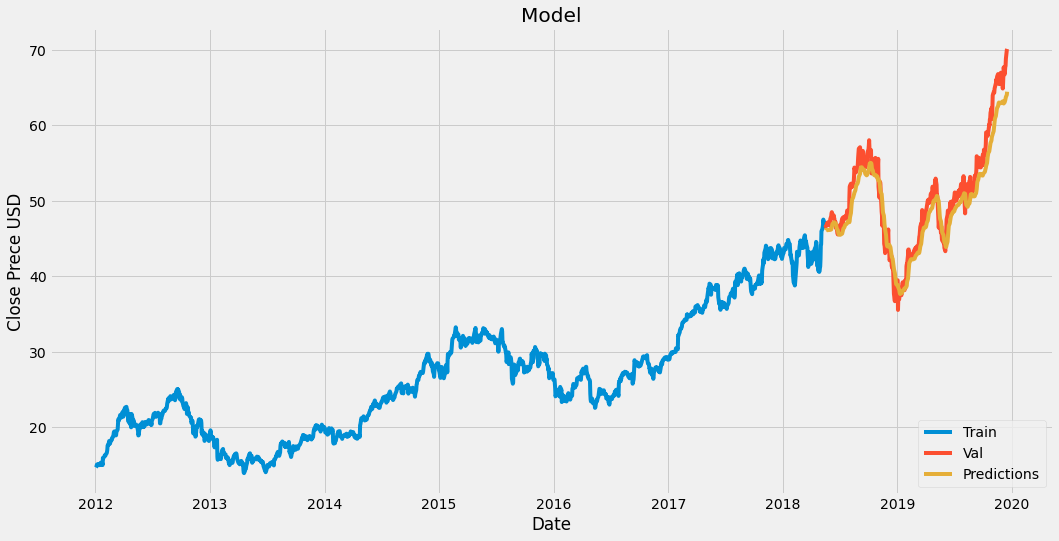

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Prece USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Show the valid and predicted prices

In [ ]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.093700
2018-05-18,46.577499,46.150467
2018-05-21,46.907501,46.140762
2018-05-22,46.790001,46.128853
2018-05-23,47.090000,46.105247
...,...,...
2019-12-11,67.692497,63.319012
2019-12-12,67.864998,63.519093
2019-12-13,68.787498,63.735813


In [ ]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Create a new data frame
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and covert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the dat
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
predicted_price = model.predict(X_test)
# Invert the scaling
predicted_price = scaler.inverse_transform(predicted_price)
# Print the result
print(predicted_price)


[[64.87381]]


### Get the next day

In [ ]:
# Get the quote
apple_quote_next_day = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')

print(apple_quote_next_day['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
